In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split

from ipywidgets import *
from IPython.display import display

import warnings

In [39]:
X_train = pd.read_csv('./output/X_train_sc.csv')
X_val = pd.read_csv('./output/X_val_sc.csv')
X_test = pd.read_csv('./output/X_test_sc.csv')

In [40]:
y_train = pd.read_csv('./output/y_train.csv')
y_val = pd.read_csv('./output/y_val.csv')

# Baseline

In [72]:
y_base = [y_train.mean()] * len(y_val)

In [73]:
r2_score(y_base,y_val)

-7.25199860654408e+30

In [74]:
mean_squared_error(y_base,y_val,squared=False)

78375.26238032707

In [129]:
scores = []

In [130]:
lr = LinearRegression()
model = 'lr'
params = 'NA'
lr.fit(X_train,y_train)
train = lr.score(X_train,y_train)
y_pred = lr.predict(X_val)
test = lr.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8899121313763972, 0.8337993575737654, 31944.89090121677]]

In [131]:
lr.coef_

array([[-5.51377985e+02,  3.96127650e+03,  1.20062081e+03,
         2.47372558e+03,  2.01978833e+03, -9.95365427e+02,
        -5.14126957e+01, -4.44484386e+02, -2.96893820e+02,
         3.88556093e+03,  1.22153365e+03,  2.48174487e+03,
         3.78908743e+02,  1.33032200e+03, -5.18941385e+02,
         2.37339432e+02,  2.63455108e+02,  3.91589518e+03,
        -3.23089936e+03, -4.33572664e+02,  1.02756766e+03,
         5.05315724e+03, -2.27356957e+03,  3.61405218e+02,
        -8.10702041e+02,  1.39616560e+03,  2.36848580e+03,
         3.13345798e+02,  8.28249067e+03,  1.17413095e+04,
        -3.56382398e+03,  6.25922005e+02, -3.25180043e+02,
         5.78715277e+02,  1.00809116e+04,  1.63383068e+03,
         2.13617418e+03, -7.20991436e+02,  1.05000208e+03,
         1.75482494e+03, -2.02021607e+03, -7.39537366e+02,
        -9.25526616e+02, -5.65989033e+02,  4.78529369e+02,
         1.42648154e+03,  1.32707120e+03,  2.43824636e+02,
        -3.28784027e+02, -1.47420985e+03,  1.16269436e+0

In [132]:
lr_coef = pd.DataFrame(lr.coef_.reshape(-1,1),X_train.columns,columns=['coef'])

In [133]:
lr_coef.sort_values(by = 'coef', key = abs, ascending=False).head(10)

,coef
remainder__totrms_abvgrd,13171.508062
ohe__neighborhood_NridgHt,11741.309474
ohe__neighborhood_StoneBr,10080.911557
remainder__exter_qual,9666.852961
remainder__full_bath,9197.504033
remainder__misc_val,-8532.484284
ohe__bldg_type_TwnhsE,-8360.685802
remainder__garage_area,8310.321438
ohe__neighborhood_NoRidge,8282.490665
remainder__bsmt_exposure,7757.685756


In [134]:
lr_coef.sort_values(by = 'coef', key = abs, ascending=False).tail(10)

,coef
ohe__electrical_SBrkr,-118.593052
ohe__exterior_1st_CBlock,-112.946978
ohe__sale_type_CWD,90.899399
remainder__enclosed_porch,89.661650
remainder__bsmtfin_type_2,-85.307551
ohe__lot_config_FR3,-51.412696
ohe__foundation_Stone,36.914938
ohe__paved_drive_P,-35.315758
ohe__electrical_FuseF,14.849296
ohe__bldg_type_Duplex,11.626944


array([[<AxesSubplot:title={'center':'coef'}>]], dtype=object)

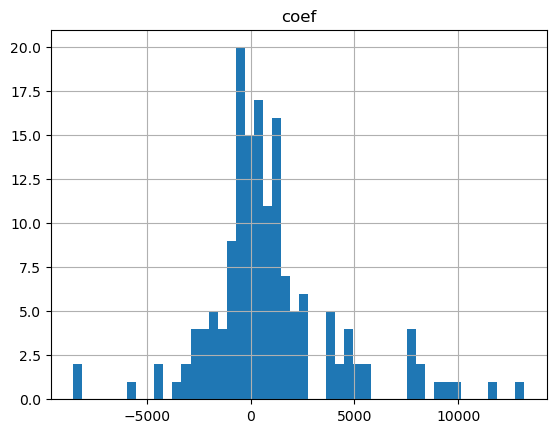

In [135]:
lr_coef.hist(bins=50)

In [136]:
ridge = Ridge()
model = 'ridge'
params = []
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8899121313763972, 0.8337993575737654, 31944.89090121677],
 ['ridge', [], 0.8899118887509456, 0.8338530611313537, 31939.72939019591]]

In [137]:
ridge.coef_

array([[-5.57298716e+02,  3.94052069e+03,  1.19514039e+03,
         2.44987658e+03,  2.02391286e+03, -9.95621866e+02,
        -5.01665953e+01, -4.43180703e+02, -2.95810321e+02,
         3.88247972e+03,  1.21778292e+03,  2.47215723e+03,
         3.75774526e+02,  1.32159362e+03, -5.10906656e+02,
         2.34200756e+02,  2.49543235e+02,  3.90912986e+03,
        -3.23228529e+03, -4.46857620e+02,  1.02368294e+03,
         5.04859562e+03, -2.25976725e+03,  3.58263903e+02,
        -8.19218973e+02,  1.38743717e+03,  2.35725673e+03,
         3.09052622e+02,  8.27111614e+03,  1.17226780e+04,
        -3.55083621e+03,  6.23256162e+02, -3.31720782e+02,
         5.67048581e+02,  1.00649272e+04,  1.62543976e+03,
         2.13266018e+03, -7.21709976e+02,  1.04862756e+03,
         1.75435579e+03, -2.01764745e+03, -7.40764345e+02,
        -9.24545035e+02, -5.65726667e+02,  4.76522849e+02,
         1.42874532e+03,  1.32807153e+03,  2.43075181e+02,
        -3.27833656e+02, -1.47619332e+03,  8.63114504e+0

In [138]:
ridge_coef = pd.DataFrame(ridge.coef_.reshape(-1,1),X_train.columns,columns=['coef'])

In [139]:
ridge_coef.sort_values(by = 'coef', key = abs, ascending=False).head(10)

,coef
remainder__totrms_abvgrd,13147.269310
ohe__neighborhood_NridgHt,11722.677968
ohe__neighborhood_StoneBr,10064.927178
remainder__exter_qual,9663.744314
remainder__full_bath,9187.668832
remainder__misc_val,-8517.393888
ohe__bldg_type_TwnhsE,-8339.433658
remainder__garage_area,8307.027016
ohe__neighborhood_NoRidge,8271.116139
remainder__bsmt_exposure,7752.794479


In [140]:
ridge_coef.sort_values(by = 'coef', key = abs, ascending=False).tail(10)

,coef
ohe__electrical_SBrkr,-117.991576
ohe__exterior_1st_CBlock,-113.783771
remainder__enclosed_porch,89.640185
ohe__sale_type_CWD,89.396020
remainder__bsmtfin_type_2,-84.162338
ohe__lot_config_FR3,-50.166595
ohe__foundation_Stone,36.378954
ohe__paved_drive_P,-34.888614
ohe__electrical_FuseF,15.257801
ohe__bldg_type_Duplex,8.631145


array([[<AxesSubplot:title={'center':'coef'}>]], dtype=object)

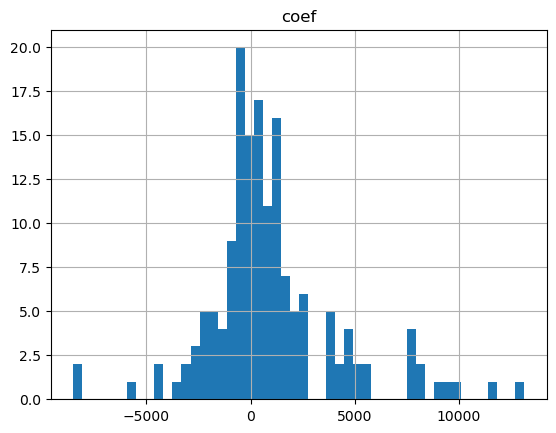

In [141]:
ridge_coef.hist(bins=50)

In [142]:
lasso = Lasso()
model = 'lasso'
params = []
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,params,train,test,mse])

In [143]:
scores

[['lr', 'NA', 0.8899121313763972, 0.8337993575737654, 31944.89090121677],
 ['ridge', [], 0.8899118887509456, 0.8338530611313537, 31939.72939019591],
 ['lasso', 0.8899120782781222, 0.833840594252439, 31940.927670682806]]

In [144]:
enet = ElasticNet()
model = 'enet'
params = []
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8899121313763972, 0.8337993575737654, 31944.89090121677],
 ['ridge', [], 0.8899118887509456, 0.8338530611313537, 31939.72939019591],
 ['lasso', 0.8899120782781222, 0.833840594252439, 31940.927670682806],
 ['enet', [], 0.8689598690064231, 0.8379479916380016, 31543.673516875326]]

In [238]:
enet = ElasticNet(
alpha = 10,
l1_ratio=0.91)

model = 'enet'
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores = [model,train,test,mse]
scores

['enet', 0.9475674197881954, 0.7940942744335877, 35556.52186435542]